In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ofertas_relampago = pd.read_csv("ofertas_relampago.csv")

## Visão geral da base de dados
Nessa área vamos explorar o dataset de forma geral para entender o que é cada coluna, como está preenchida e que
formas de visualizações e agrupamentos podemos realizar para gerar algum insight de valor.

Também farei alguns tratamentos de dados, como preenchimento de valores vazios e drop de colunas, para facilitar processamentos futuros.

In [43]:
ofertas_relampago.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,offer_duration_in_minutes,avg_ticket
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS,422.716667,0.786667
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,360.033333,0.000000
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS,360.016667,3.576667
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES,396.200000,3.515000
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES,168.200000,2.643333


In [65]:
ofertas_relampago.OFFER_TYPE.value_counts() #A base possui somente ofertas relampago?

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

In [66]:
print(ofertas_relampago.OFFER_START_DATE.min(), ofertas_relampago.OFFER_START_DATE.max()) #Qual recorte temporal

2021-06-01 2021-07-31


In [5]:
ofertas_relampago.isna().sum() #Valores nulos?

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [35]:
ofertas_relampago.SHIPPING_PAYMENT_TYPE.value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [6]:
ofertas_relampago.ORIGIN.value_counts()

A    11316
Name: ORIGIN, dtype: int64

In [7]:
ofertas_relampago.count()

OFFER_START_DATE             48746
OFFER_START_DTTM             48746
OFFER_FINISH_DTTM            48746
OFFER_TYPE                   48746
INVOLVED_STOCK               48746
REMAINING_STOCK_AFTER_END    48746
SOLD_AMOUNT                  24579
SOLD_QUANTITY                24579
ORIGIN                       11316
SHIPPING_PAYMENT_TYPE        48746
DOM_DOMAIN_AGG1              48746
VERTICAL                     48746
DOMAIN_ID                    48746
dtype: int64

In [8]:
ofertas_relampago[["SOLD_AMOUNT", "SOLD_QUANTITY"]].min()

SOLD_AMOUNT      0.28
SOLD_QUANTITY    1.00
dtype: float64

#### Considerações iniciais sobre os dados

1. A princípio não temos muito valor na coluna <b>ORIGIN</b>, que está majoritariamente vazia quando não esta preenchida com o valor "A". Essa <b>coluna será removida</b>.

2. <b>SOLD_AMOUNT e SOLD_QUANTITY</b> possuem uma grande quantidade de valores vazios e nenhum valor zero. Vou assumir que os valores vazios são provenientes de alguma operação de JOIN com uma tabela transacional e significam que  essas campanhas não tiveram vendas, portanto preencherei os valores com <b>Zero</b>.

3. Uma coluna com o <b>delta entre inicio e fim</b> de cada campanha pode ser util para faciltiar processamentos futuros

4. Uma coluna com <b>ticket médio</b> por oferta também pode trazer algum insight
5. A base é composta por informações um período temporal especifico 2021-06-01 até 2021-07-31


In [9]:
ofertas_relampago = ofertas_relampago.drop(["ORIGIN"],axis=1)

In [10]:
ofertas_relampago.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

In [11]:
delta_time_offer = (pd.to_datetime(ofertas_relampago["OFFER_FINISH_DTTM"]) - pd.to_datetime(ofertas_relampago["OFFER_START_DTTM"]))

In [12]:
ofertas_relampago["offer_duration_in_minutes"] = delta_time_offer.dt.total_seconds()/60

In [13]:
ofertas_relampago["avg_ticket"] = ofertas_relampago.SOLD_AMOUNT/ofertas_relampago.SOLD_QUANTITY

In [14]:
ofertas_relampago = ofertas_relampago.fillna(0)

### Primeiros Insights

- Qual a classificação das ofertas mais vendidas em quantidade e em valor financeiro?


In [15]:
ofertas_relampago["DOM_DOMAIN_AGG1"].value_counts() #quantas ofertas temos de cada tipo?

HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS                       193
B

In [233]:
domain_quantity_agg = ofertas_relampago.groupby("DOM_DOMAIN_AGG1")[["SOLD_QUANTITY"]].mean().sort_values("SOLD_QUANTITY", ascending=False).reset_index()

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


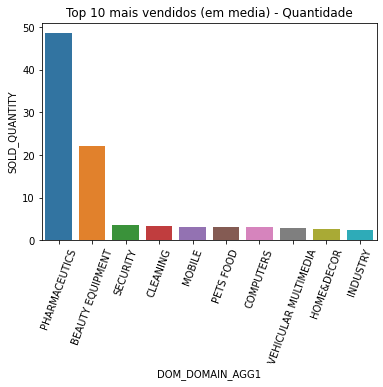

In [234]:
sns.barplot(domain_quantity_agg["DOM_DOMAIN_AGG1"].head(10),domain_quantity_agg["SOLD_QUANTITY"].head(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 mais vendidos (em media) - Quantidade")

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


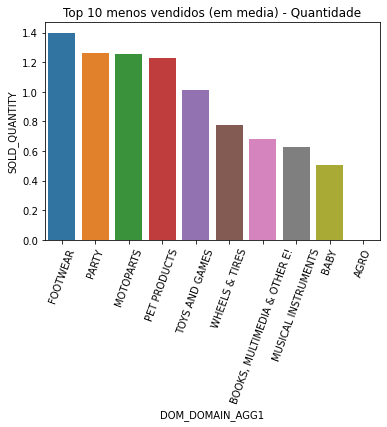

In [235]:
sns.barplot(domain_quantity_agg["DOM_DOMAIN_AGG1"].tail(10),domain_quantity_agg["SOLD_QUANTITY"].tail(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 menos vendidos (em media) - Quantidade")

In [27]:
domain_amount_agg = ofertas_relampago.groupby("DOM_DOMAIN_AGG1")[["SOLD_AMOUNT"]].mean().sort_values("SOLD_AMOUNT", ascending=False).reset_index()

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


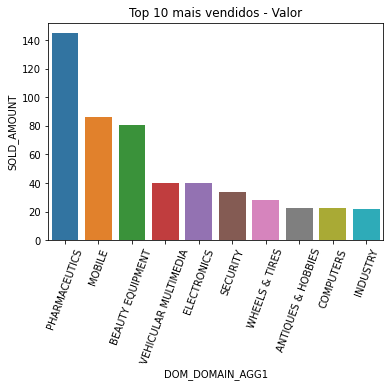

In [28]:
sns.barplot(domain_amount_agg["DOM_DOMAIN_AGG1"].head(10),domain_amount_agg["SOLD_AMOUNT"].head(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 mais vendidos (em media) - Valor")

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


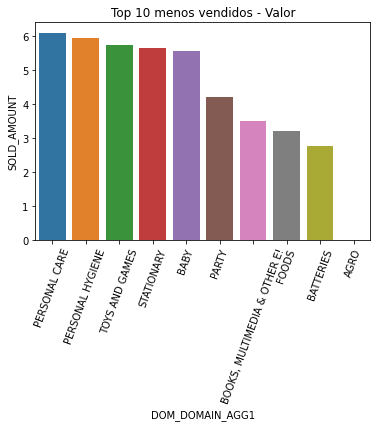

In [29]:
sns.barplot(domain_amount_agg["DOM_DOMAIN_AGG1"].tail(10),domain_amount_agg["SOLD_AMOUNT"].tail(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 menos vendidos (em media) - Valor")

In [22]:
domain_time_agg = ofertas_relampago.groupby("DOM_DOMAIN_AGG1")[["offer_duration_in_minutes"]].median().sort_values("offer_duration_in_minutes", ascending=False).reset_index()

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


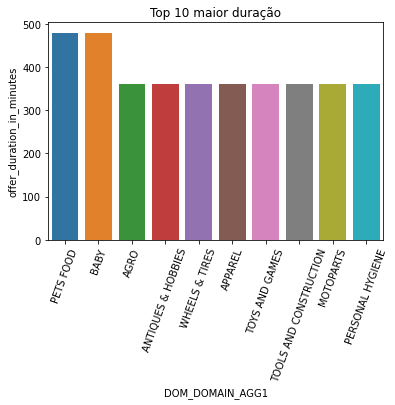

In [23]:
sns.barplot(domain_time_agg["DOM_DOMAIN_AGG1"].head(10),domain_time_agg["offer_duration_in_minutes"].head(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 maior duração")

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


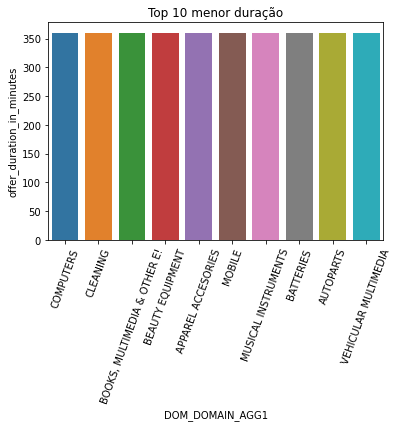

In [24]:
sns.barplot(domain_time_agg["DOM_DOMAIN_AGG1"].tail(10),domain_time_agg["offer_duration_in_minutes"].tail(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 menor duração")

In [30]:
domain_stock_agg = ofertas_relampago.groupby("DOM_DOMAIN_AGG1")[["INVOLVED_STOCK"]].mean().sort_values("INVOLVED_STOCK", ascending=False).reset_index()

In [34]:
ofertas_relampago["INVOLVED_STOCK"].mean() #estoque medio 

35.00750830837402

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


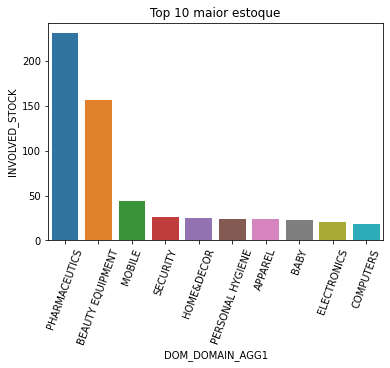

In [32]:
sns.barplot(domain_stock_agg["DOM_DOMAIN_AGG1"].head(10),domain_stock_agg["INVOLVED_STOCK"].head(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 maior estoque")

C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


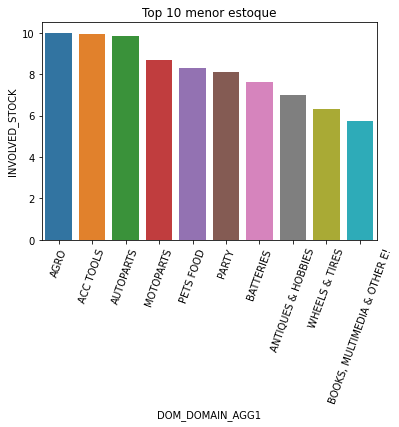

In [33]:
sns.barplot(domain_stock_agg["DOM_DOMAIN_AGG1"].tail(10),domain_stock_agg["INVOLVED_STOCK"].tail(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 menor estoque")

#### Sobre DOM_DOMAIN_AGG1 e Vendas

1. Produtos farmaceuticos possuem o maior volume de vendas e maior valume monetario total de vendas, mesmo sendo a sexta campanha mais frequente na base, indicando ser altamente eficiente.

2. BEAUTY EQUIPMENT é a décima sexta campanha mais volumosa na base, porém é a segunda com maior volume de vendas e quarta em valor monetário.

3. Não parece haver uma discrepância grande entre a mediana de tempo de duração de cada oferta (variando entre 400 e 300 minutos). Aqui usamos a mediana para garantir que não teremos vieses de poucas ofertas com periodos muito grandes de duração e vice-versa.

4. Ofertas de Farmácia e produtos de beleza possuem maior estoque, explicando a razão de venderem tanto por oferta. Porém talvez não seja a unica razão da venda.
<br>

A análise a baixo busca abrir cada DOMAIN dentro da agregação de DOMAIN_AGG, para entender mais a fundo se algum tipo de oferta vende mais dentro das categorias

In [46]:
ofertas_relampago.groupby(["DOM_DOMAIN_AGG1","DOMAIN_ID"])[["SOLD_QUANTITY"]].mean().sort_values("SOLD_QUANTITY", ascending=False).head(15)

SOLD_QUANTITY
DOM_DOMAIN_AGG1        DOMAIN_ID                                       
INDUSTRY               MLM-CARD_PAYMENT_TERMINALS            119.166667
PHARMACEUTICS          MLM-SURGICAL_AND_INDUSTRIAL_MASKS      80.368960
BEAUTY EQUIPMENT       MLM-DISPOSABLE_GLOVES                  74.049451
                       MLM-OXIMETERS                          62.100719
CLEANING               MLM-KITCHEN_PAPER_TOWELS               35.000000
                       MLM-LAUNDRY_BAR_SOAPS                  30.250000
PHARMACEUTICS          MLM-THERMOMETERS                       17.168182
CLEANING               MLM-CLEANING_MOPS                      16.333333
TOOLS AND CONSTRUCTION MLM-LINEMAN_PLIERS                     15.000000
PHARMACEUTICS          MLM-NASAL_CPAP_MASKS                   15.000000
TOOLS AND CONSTRUCTION MLM-COMBINED_TOOL_SETS                 14.333333
STATIONARY             MLM-PACKAGING_CONTAINERS               11.200000
BEAUTY EQUIPMENT       MLM-ORTHOPEDIC_ANKLE_BRACES            11.000000
PERSONAL HYGIENE       MLM-WET_BABY_WIPES                     10.428571
HOME&DECOR             MLM-HONEY_SPOONS                       10.000000

In [56]:
#Vamos remover máscaras e analisar novamente os valores de vendas
domain_amount_agg_without_mask = ofertas_relampago[ofertas_relampago["DOMAIN_ID"]!= "MLM-SURGICAL_AND_INDUSTRIAL_MASKS"] \
                                .groupby("DOM_DOMAIN_AGG1")[["SOLD_QUANTITY"]]\
                                .mean()\
                                .sort_values("SOLD_QUANTITY", ascending=False).reset_index()


C:\Users\mcfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


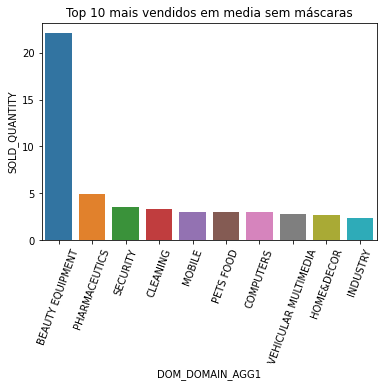

In [57]:
sns.barplot(domain_amount_agg_without_mask["DOM_DOMAIN_AGG1"].head(10),domain_amount_agg_without_mask["SOLD_QUANTITY"].head(10))
_,_ = plt.xticks(rotation=70) #apenas rotacionando a legenda
_ = plt.title("Top 10 mais vendidos em media sem máscaras")

Percebe-se que <b>MLM-SURGICAL_AND_INDUSTRIAL_MASKS</b> é um dos itens mais vendidos em média dentro de ofertas de Farmacia, o que se relaciona diretamente com o período de análise da base, que era a <b>pandemia do COVID-19</b>
<br>Não parece razoável acreditar que esse tipo de item continuará vendendo tão bem no futuro, mas faltam evidências nesse conjunto de dados para confirmar essa hipotese.
<br> Ao remover Ofertas de Máscara, Farmácia perde sua posição de mais vendido para Produtos de Beleza, porém continua em evidência, sendo os segundo mais vendido.

#### Análise de multivariada de regressão

Com os achados acima, entendemos que existem ofertas que vendem mais do que outras, mesmo com um tempo parecido de duração. Estoque parece ter influência direta nessa relação, mas talvez outros componentes também tenham. Fazer uma análise manual de cada valor de variável pode ser invável e muito custoso de tempo. <b>A solução: uma análise de regressão multivariada </b>

Qual a caracteristica de uma oferta bem sucedida em termos de venda?
<br>

A métodologia usada será a seguinte:
- Converteremos todos os valores de SHIPPING_PAYMENT_TYPE e DOMAIN_ID para numericos
    - SHIPPING_PAYMENT_TYPE será binário 0 ou 1 (tem ou não tem frete grátis)
    - DOMAIN_ID será transformado em uma matrix esparsa onde cada categoria será um valor 0 ou 1 (é ou não aquela categoria)
- Normalizamos os campos "INVOLVED_STOCK", "offer_duration_in_minutes", "avg_ticket" para ter valores entre 0 e 1
    - Essa normalização auxilia a interpretar os pesos na regressão, visto que a escala das variáveis é muito diferente
- Vamos selecionar <b>somente DOM_DOMAIN_AGG1 relevantes</b>, sendo o critério:
    - Top 5 mais volumosos: "HOME&DECOR", "APPAREL ACCESORIES", "APPAREL", "COMPUTERS","SPORTS"
    - Top 2 mais vendidos: "PHARMACEUTICS", "BEAUTY EQUIPMENT"
- Para cada DOM_DOMAIN_AGG1, rodamos uma Regressão Linear tendo como alvo SOLD_QUANTITY
    - Como queremos encontrar os fatores mais relevantes, usamos uma Regressão de LASSO, pois ela zera os pesos de fatores menos relevantes em uma velocidade maior.
- Ao final do processo teremos 7 regressores contendo os fatores que mais influenciam positivamente cada tipo de DOM_DOMAIN_AGG1 ofertado

In [62]:
ofertas_relampago["shipping_type_bin"] = [1 if i == "free_shipping" else 0 for i in ofertas_relampago.SHIPPING_PAYMENT_TYPE]

In [70]:
ofertas_relampago.DOMAIN_ID.value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1759
MLM-HEADPHONES                        761
MLM-LED_STRIPS                        518
MLM-SUNGLASSES                        472
MLM-VEHICLE_LED_BULBS                 454
                                     ... 
MLM-AQUARIUM_AUTOMATIC_FEEDERS          1
MLM-MEDICAL_TOURNIQUETS                 1
MLM-CLARINETS                           1
MLM-CHURRO_MAKING_MACHINES              1
MLM-AUTOMOTIVE_SPRING_SUSPENSIONS       1
Name: DOMAIN_ID, Length: 1266, dtype: int64

In [75]:
features = ["INVOLVED_STOCK", "offer_duration_in_minutes", "avg_ticket", "shipping_type_bin", "DOMAIN_ID"]

In [134]:
from sklearn.linear_model import  Lasso #Usamos LASSO para remover o que tiver pouca relevância
from sklearn.preprocessing import MinMaxScaler 

In [94]:
ofertas_relampago["DOM_DOMAIN_AGG1"].value_counts() #quantas ofertas temos de cada tipo?

HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS                       193
B

In [141]:
outputs = {}
domains = ["HOME&DECOR", "APPAREL ACCESORIES", "APPAREL", "COMPUTERS","SPORTS","PHARMACEUTICS", "BEAUTY EQUIPMENT"]
for domain in domains:
    print(domain)
    outputs[domain] = {'reg_model':[], 'df_output':[]}
    df_reg = pd.get_dummies(ofertas_relampago[ofertas_relampago["DOM_DOMAIN_AGG1"] == domain][features], columns = ["DOMAIN_ID"])
    target = ofertas_relampago[ofertas_relampago["DOM_DOMAIN_AGG1"] == domain]["SOLD_QUANTITY"]
    df_reg_norm = MinMaxScaler().fit_transform(df_reg)
    reg = Lasso(alpha=0.01).fit(df_reg_norm, target)
    outputs[domain]['reg_model'].append(reg)
    df_output = pd.DataFrame().from_dict({"features":df_reg.columns, "coefs":reg.coef_}).sort_values("coefs", ascending=False)
    outputs[domain]['df_output'].append(df_output)

HOME&DECOR
APPAREL ACCESORIES
APPAREL
COMPUTERS
SPORTS
PHARMACEUTICS
BEAUTY EQUIPMENT


In [232]:
for domain in domains:
    print(domain)
    print(outputs[domain]["df_output"][0].reset_index())

HOME&DECOR
     index                                   features      coefs
0        0                             INVOLVED_STOCK  11.633185
1        2                                 avg_ticket  10.571172
2      125  DOMAIN_ID_MLM-MANUAL_DRINKING_WATER_PUMPS   4.062970
3      122                  DOMAIN_ID_MLM-LIGHT_BULBS   4.034880
4       16                   DOMAIN_ID_MLM-BED_SHEETS   2.799328
..     ...                                        ...        ...
189    104                DOMAIN_ID_MLM-KITCHEN_MOLDS  -1.257504
190    165                     DOMAIN_ID_MLM-STICKERS  -1.375521
191     74                 DOMAIN_ID_MLM-GARDEN_HOSES  -1.487174
192     47            DOMAIN_ID_MLM-DECORATIVE_VINYLS  -1.749035
193      3                          shipping_type_bin  -1.755778

[194 rows x 3 columns]
APPAREL ACCESORIES
    index                                          features     coefs
0       2                                        avg_ticket  9.914502
1       0                 

In [201]:
for domain in domains:
    output = outputs[domain]["df_output"][0].reset_index()
    print(f"""Para o grupo {domain}, os fatores mais relevantes para uma oferta vender são:{output.features[0]} {output.coefs[0]},{output.features[1]}  {output.coefs[1]} e {output.features[2]}  {output.coefs[2]}. 
          Ofertas que vendem menos são do tipo {output.features.iloc[-1]} {output.coefs.iloc[-1]}, {output.features.iloc[-2]} {output.coefs.iloc[-2]} e {output.features.iloc[-3]} {output.coefs.iloc[-3]}\n\n""")

Para o grupo HOME&DECOR, os fatores mais relevantes para uma oferta vender são:INVOLVED_STOCK 11.633184816670042,avg_ticket  10.571172412325868 e DOMAIN_ID_MLM-MANUAL_DRINKING_WATER_PUMPS  4.062970128943863. 
          Ofertas que vendem menos são do tipo shipping_type_bin -1.7557778372413053, DOMAIN_ID_MLM-DECORATIVE_VINYLS -1.7490349008670438 e DOMAIN_ID_MLM-GARDEN_HOSES -1.4871744846193202


Para o grupo APPAREL ACCESORIES, os fatores mais relevantes para uma oferta vender são:avg_ticket 9.914502390195196,INVOLVED_STOCK  4.487438267891038 e DOMAIN_ID_MLM-SUNGLASSES  1.89257879081378. 
          Ofertas que vendem menos são do tipo shipping_type_bin -1.219824523944697, DOMAIN_ID_MLM-KEYCHAINS -0.5030844592896475 e DOMAIN_ID_MLM-CHARMS_AND_MEDALS -0.3178852968244967


Para o grupo APPAREL, os fatores mais relevantes para uma oferta vender são:INVOLVED_STOCK 133.2158366104291,avg_ticket  10.13521744273168 e DOMAIN_ID_MLM-PANTIES  0.8153672434174769. 
          Ofertas que vendem menos 

In [222]:
selles_per_domain = ofertas_relampago.groupby("DOMAIN_ID").sum()[["SOLD_QUANTITY"]].reset_index()
selles_per_domain[selles_per_domain["SOLD_QUANTITY"] == 0].count()/selles_per_domain.count()

DOMAIN_ID        0.28357
SOLD_QUANTITY    0.28357
dtype: float64

In [228]:
ofertas_relampago[ofertas_relampago["SOLD_QUANTITY"] == 0].count()/ofertas_relampago["SOLD_QUANTITY"].count()

OFFER_START_DATE             0.495774
OFFER_START_DTTM             0.495774
OFFER_FINISH_DTTM            0.495774
OFFER_TYPE                   0.495774
INVOLVED_STOCK               0.495774
REMAINING_STOCK_AFTER_END    0.495774
SOLD_AMOUNT                  0.495774
SOLD_QUANTITY                0.495774
SHIPPING_PAYMENT_TYPE        0.495774
DOM_DOMAIN_AGG1              0.495774
VERTICAL                     0.495774
DOMAIN_ID                    0.495774
offer_duration_in_minutes    0.495774
avg_ticket                   0.495774
shipping_type_bin            0.495774
dtype: float64

## Conclusões e Recomendações

1. A maioria dos tipos de ofertas são irrelevantes quando associadas com outras variáveis. Isso se deve ao fato de que 28.3% dos DOMAIN_IDs não possuem nenhuma venda associada. Também sabemos que 49.5% das Ofertas não realizaram nenhuma venda, portanto esses DOMAIN_IDs tiveram mais de uma oferta associada. <b> Recomendo que algumas ofertas não sejam mais realizadas, quantitativamente podemos definir como critério de exclusão as ofertas com pesos negativos na análise de regressão</b>
<br>

2. Produtos farmaceuticos são os mais vendidos, porém percebe-se que é muito puxado por ofertas de máscaras e isso carrega um viés da pandemia. <b>Recomedo que essas ofertas sejam feitas de forma assistida para coletar evidências de sua eficiência futura</b> 
<br>

3. Na análise de regressão, percebemos que o fator Estoque sempre possui uma forte relação com a quantidade vendida, que faz sentido de forma intuitiva. O ticket médio da oferta também. Para ambos a relação é positiva (quanto maior o estoque e o ticket do produto ofertado, mais venda). <b>Isso pode ter relação com a intensidade do desconto da oferta informação ausente no conjunto de dados.</b>
  - 3.1. De forma contra intuitiva, em todos os casos <b>ter frete grátis parece influenciar negativamente</b> a venda da oferta. Uma hipotese pode ser de que uma oferta que tenha frete grátis também seja uma oferta menos atrativa (desconto menor) ou um produto pouco demandado.
  - 3.2. O <b>tempo da oferta</b> não parece ter variância suficiete para discriminar o sucesso de uma oferta na maioria dos casos. Exceto para <b>Computers  e Sports, onde temos uma relação inversamente proporcional</b> (quanto mais tempo, menos venda - hipotese de que produtos menos demandados possuem mais tempo de oferta) e em <b>BEAUTY EQUIPMENT, onde a relação é diretamente proporcional</b> (quanto mais tempo, mais venda).
  

4. Para os 7 DOM_DOMAIN_AGG1 análisados, seguem alguma recomendações de ofertas e pontos de atenção:
    - HOME&DECOR: MLM-MANUAL_DRINKING_WATER_PUMPS, MLM-LIGHT_BULBS são os tipos de ofertas com maiores pesos pra venda, enquanto MLM-DECORATIVE_VINYLS e MLM-GARDEN_HOSES são as ofertas com menores pesos.
    - APPAREL ACCESORIES: MLM-SUNGLASSES e MLM-BODY_SHAPERS são os tipos de ofertas com maiores pesos pra venda, enquanto MLM-KEYCHAINS e MLM-CHARMS_AND_MEDALS são as ofertas com menores pesos.
    - APPAREL: MLM-PANTIES e T_SHIRTS são os tipos de ofertas com maiores pesos pra venda, enquanto MLM-DRESSES e MLM-SWIMWEAR são as ofertas com menores pesos. <b>Aqui podemos ter algum efeito sazonal de moda</b>
    - COMPUTERS: MLM-HEADPHONES e KEYBOARD_AND_MOUSE_KITS são os tipos de ofertas com maiores pesos pra venda, enquanto MLM-WRISTWATCH_SCREEN_PROTECTORS e MLM-LAPTOP_CHARGERS são as ofertas com menores pesos.
    - SPORTS: MLM-THERMOSES e JUMP_ROPES são os tipos de ofertas com maiores pesos pra venda, enquanto SPORTS_AND_FITNESS e MLM-WORKOUT_BENCHES são as ofertas com menores pesos. <b> Podemos ter aqui um viés da pandemia, onde as pessoas se exercitavam em casa </b>
    - PHARMACEUTICS:MLM-SURGICAL_AND_INDUSTRIAL_MASKS e MLM-OXYGEN_CONCENTRATORS são os tipos de ofertas com maiores pesos pra venda, enquanto SORE_THROAT_MEDICINES e COUGH_COLD_AND_FLU_MEDICINES são as ofertas com menores pesos. <b> Aqui percebemos o forte viés de pandemia no conjunto de dados</b>
    - BEAUTY EQUIPMENT: MLM-DISPOSABLE_GLOVES e MLM-PORTABLE_ELECTRIC_MASSAGERS são os tipos de ofertas com maiores pesos pra venda, enquanto MLM-OXIMETERS e MLM-BACKWASH_UNI são as ofertas com menores pesos. <b>Talvez aqui tenha algum viés de pandemia também com a venda de luvas</b>


5. Limitações da análise: Por não serem dados provenientes de um experimento aleatório, não podemos associar diretamente uma relação causal na regressão. Além disso, faltam informações relevantes como a intensidade da ofertas, que poderiam ser próximos passos para complementar a análise. É importante que todas as recomendações aqui descritas sejam testadas com um experimento antes de entrar em vigor efetivamente.